# Data cleaning

In [1]:
from imports import *
%matplotlib inline

In [2]:
df_shapes_log = pd.DataFrame()

## Import datasets processed in previous step

In [3]:
df=pd.read_hdf(config.df_initial, 'df')
df_test=pd.read_hdf(config.df_test_initial, 'df')


## Analyze power transform of lead time

Text(0.5, 1.0, 'After power transform')

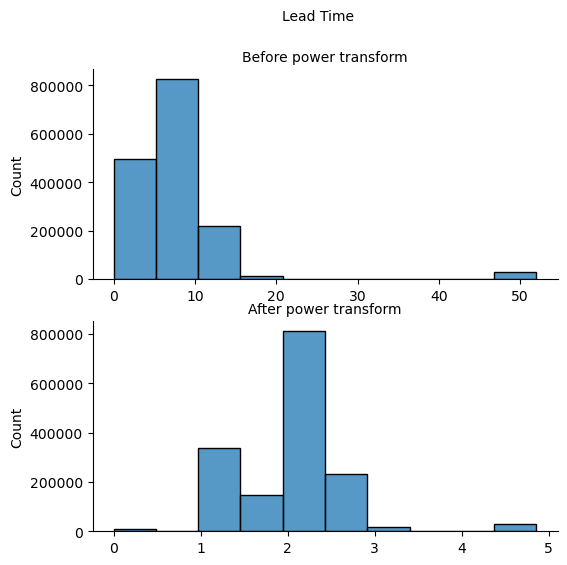

In [4]:
df_power_transform = df.copy()
df_power_transform['lead_time'] = df_power_transform['lead_time']**0.4

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))
sns.despine(fig)
sns.histplot(ax=axes[0], data=df, x='lead_time', bins=10)
sns.histplot(ax=axes[1], data=df_power_transform, x='lead_time', bins=10)
fig.suptitle("Lead Time", fontsize=10)
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_title('Before power transform', fontsize=10)
axes[1].set_title('After power transform', fontsize=10)

## Apply chosen data cleaning

In [5]:
def data_cleaning(d: pd.DataFrame):

    categorical_columns = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk','stop_auto_buy', 'rev_stop', 'went_on_backorder']

    for col in categorical_columns:
        d[col] = d[col].map({'No':0, 'Yes':1})

    # Set performance values '-99' as missing values
    d.perf_6_month_avg = np.where(d.perf_6_month_avg == -99, np.nan, d.perf_6_month_avg)
    d.perf_12_month_avg = np.where(d.perf_12_month_avg == -99, np.nan, d.perf_12_month_avg)

    # Powertransform skewed features
    d['lead_time'] = d['lead_time']**0.4

In [6]:
data_cleaning(df)
data_cleaning(df_test)

In [7]:
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0,0,0,1,0,0
1,2.0,2.408225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,1,0,0,1,0,0
3,7.0,2.297397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,NaN,NaN,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,1.319508,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,...,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1687856,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,...,0.0,NaN,NaN,1.0,0,0,0,1,0,0
1687857,-1.0,2.408225,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,...,0.0,0.86,0.84,1.0,1,0,0,0,0,1
1687858,62.0,2.408225,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,...,0.0,0.86,0.84,6.0,0,0,0,1,0,0


In [8]:
df_test

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,1,0,0,1,0,0
1,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0,0,1,0,0,0
2,17.0,2.297397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,9.0,1.319508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,2.0,2.297397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242070,12.0,2.701920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242071,13.0,2.701920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242072,13.0,2.701920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242073,10.0,2.701920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0


## Missing values resume

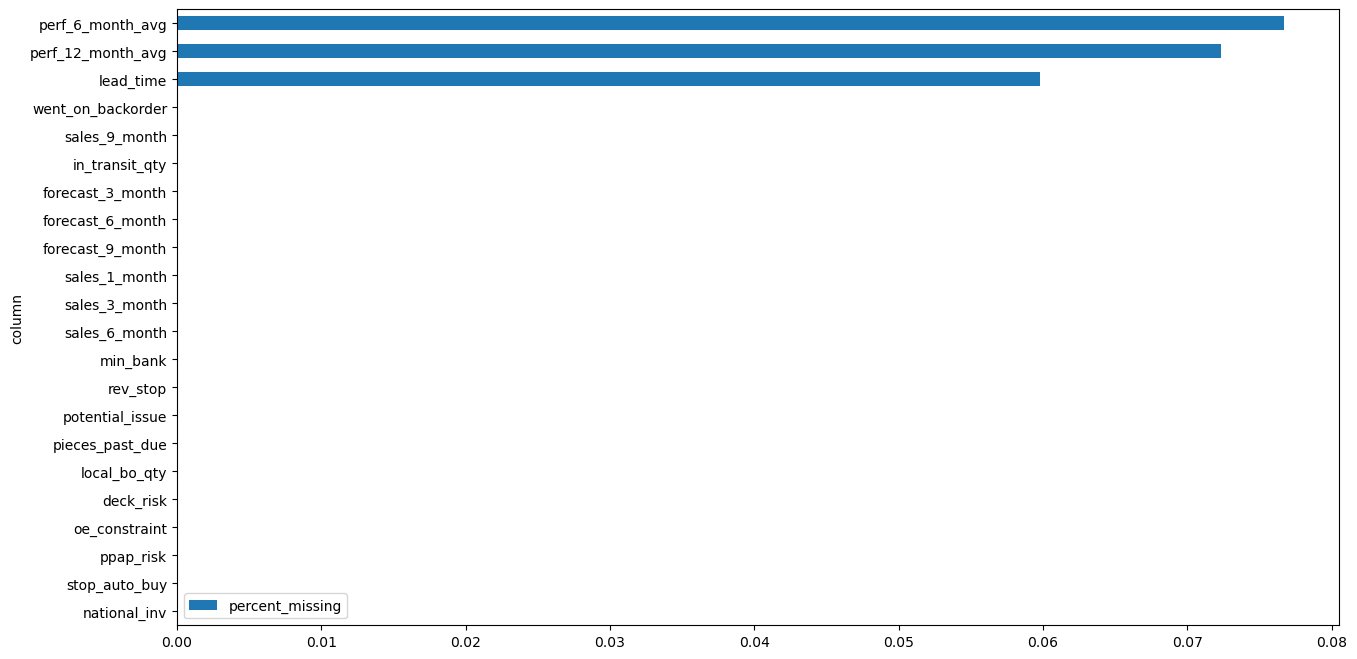

In [9]:
fn.plot_missing_values(df)

## Export processed data sets to be used in next steps

In [10]:
df.to_hdf(config.df_cleaned, 'df', 'w')
df_test.to_hdf(config.df_test_cleaned, 'df', 'w')